In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
# Build gdf
def addon_H3K36me3_gene(df_regl_arg):
    random.seed(1)
    def H3K36me3_gene_id_(prom_fwd_gene_id, prom_rev_gene_id, associated_gene_id):
        if prom_fwd_gene_id != '.' and prom_rev_gene_id != '.':
            return random.choice([prom_fwd_gene_id, prom_rev_gene_id])
        elif prom_fwd_gene_id != '.':
            return prom_fwd_gene_id
        elif prom_rev_gene_id != '.':
            return prom_rev_gene_id
        else:
            return random.choice(associated_gene_id.split(','))

    df_regl_ = df_regl_arg.copy()
    df_regl_['H3K36me3_gene_id'] = list(map(H3K36me3_gene_id_, 
                                           df_regl_arg['promoter_gene_id_fwd'],
                                           df_regl_arg['promoter_gene_id_rev'],
                                           df_regl_arg['associated_gene_id']))

    col_ = ['chrom', 'start', 'end', 'strand', 'gene_id']
    df_genes = pd.read_csv('WS260_ce10/WS260_ce10.genes_by_CV.tsv', sep='\t')[col_]\
        .drop_duplicates(subset=['gene_id']) # CV table has two duplicate gene records where a gene is annotated in *two* distinct operons

    df_genes.columns = [
        'H3K36me3_gene_chrom',
        'H3K36me3_gene_start',
        'H3K36me3_gene_end',
        'H3K36me3_gene_strand',
        'H3K36me3_gene_id',
    ]

    df_regl = df_regl_.merge(df_genes, how='left', left_on='H3K36me3_gene_id', right_on='H3K36me3_gene_id')
    m_ = ~(df_regl['H3K36me3_gene_strand'] == '-')
    df_regl['H3K36me3_gene_start'] -= 1
    df_regl.loc[m_, 'H3K36me3_gene_end'] = df_regl.loc[m_, 'H3K36me3_gene_start'] + 1
    df_regl.loc[~m_, 'H3K36me3_gene_start'] = df_regl.loc[~m_, 'H3K36me3_gene_end'] - 1
    return df_regl

df_regl = regl_addons()
addon_H3K4me3(df_regl)
#df_regl_H3K36me3 = addon_H3K36me3_gene(df_regl)
#gdf = yp.GenomicDataFrame(df_regl_H3K36me3, pos_column='tss_fwd')
gdf = yp.GenomicDataFrame(df_regl, pos_column='tss_fwd')

7076 non-promoters outside of outron/gene body (=no gene_id)


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


13195 of 42245 sites with CV values via promoter annotation
32525 of 42245 sites with CV values via "associated gene"
H3K4me3 wt_emb True


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: Mean of empty slice
/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: All-NaN slice encountered


H3K4me3 wt_l1 True
H3K4me3 wt_l2 True
H3K4me3 wt_l3 True
H3K4me3 wt_l4 True
H3K4me3 wt_ya True


In [3]:
#fp_ = pf('Chen13_INR_2', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_INR_3', 'scanMotifGenomeWide', '_5fwd.bw', 'motifs')
#fp_ = pf('Chen13_INR_4', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_INR_5', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_INR_6', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_INR_7', 'scanMotifGenomeWide', '.bed', 'motifs')
fp_ = pf('Sloutskin2015_mammalian_Initiator', 'scanMotifGenomeWide', '_2fwd.bw', 'motifs')
gdf.add_track('Inr_fwd', fp_, flank_len=50, bin_size=1, f_bin=np.nanmean, pos_column='tss_fwd')

#fp_ = pf('TATAAAA_Saito2013', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('TATAAAA_1', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_TATA_01_4', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_TATA_01_5', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_TATA_01_8', 'scanMotifGenomeWide', '.bed', 'motifs')
#fp_ = pf('Chen13_TATA_01_8', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
#fp_ = pf('Chen13_TATA_01_9', 'scanMotifGenomeWide', '.bed', 'motifs')

#fp_ = pf('Saito2013_TATA', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
fp_ = pf('Sloutskin2015_TATA_box', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
#fp_ = pf('Roy2015_TATA1', 'scanMotifGenomeWide', '_0fwd.bw', 'motifs')
gdf.add_track('TATA_fwd', fp_, flank_len=50, bin_size=1, f_bin=np.nanmean, pos_column='tss_fwd')

fp_ = 'etc/CpG_ce10_sw200bp.bw'
gdf.add_track('CpG_fwd', fp_, flank_len=500, bin_size=1, f_bin=np.nanmean, pos_column='atac_mode')

mread_regions True Sloutskin2015_mammalian_Initiator.scanMotifGenomeWide_2fwd.bw.mread_regions_efbc9730880d36bc0643888cb226dfee.tmp
mread_regions True Sloutskin2015_TATA_box.scanMotifGenomeWide_0fwd.bw.mread_regions_33de71e333599c2e318975857b3dec4c.tmp
mread_regions True CpG_ce10_sw200bp.bw.mread_regions_baed30880c0de08b5c8f3ace6dfeebd4.tmp


In [4]:
label_h = 'Top H3K4me3'
label_m = 'Medium H3K4me3'
label_l = 'Bottom H3K4me3'
fp_fig = 'annot/FigB_motifs/Inr_TATA_CpG_sortbyH3K4me3.png'
gdf_p = gdf.query('(annot_fwd == "coding_promoter") & (CV == CV)').sort(['H3K4me3_mean_mean'], ascending=False)
gdf_e = gdf.query('(annot == "putative_enhancer") & (CV == CV)').sort(['H3K4me3_mean_mean'], ascending=False)

#label_h = 'Stable CV'
#label_m = 'Intermediate CV'
#label_l = 'Regulated CV'
#fp_fig = 'annot/FigB_motifs/Inr_TATA_CpG_sortbyCV.png'
#gdf_p = gdf.query('(annot_fwd == "coding_promoter") & (CV == CV)').sort(['CV'])
#gdf_e = gdf.query('(annot == "putative_enhancer") & (CV == CV)').sort(['CV'])

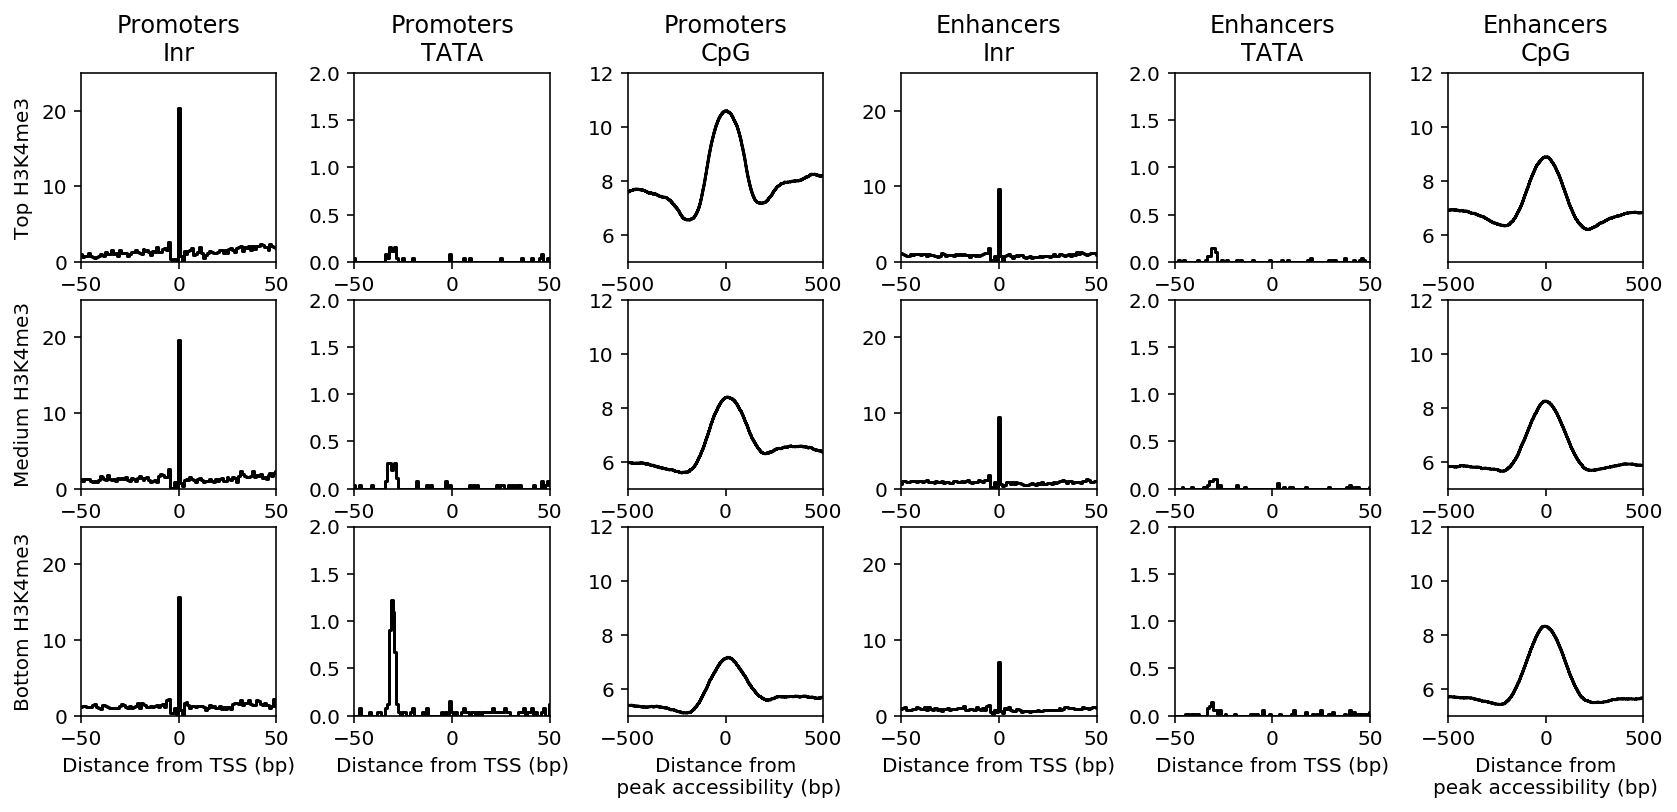

In [5]:
# Each profile on separate subplots
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(wspace=0.4)
ylim_inr = (0, 25)
ylim_tata = (0, 2)
ylim_CpG = (5, 12)

plt.subplot(4,6,1)
gdf_p.t['Inr_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=0)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_title('Promoters\nInr')
plt.gca().set_ylabel(label_h)

plt.subplot(4,6,7)
gdf_p.t['Inr_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=1)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_ylabel(label_m)

plt.subplot(4,6,13)
gdf_p.t['Inr_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=2)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_xlabel('Distance from TSS (bp)')
plt.gca().set_ylabel(label_l)

plt.subplot(4,6,2)
gdf_p.t['TATA_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=0)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_title('Promoters\nTATA')

plt.subplot(4,6,8)
gdf_p.t['TATA_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=1)
plt.gca().set_ylim(*ylim_tata)

plt.subplot(4,6,14)
gdf_p.t['TATA_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=2)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_xlabel('Distance from TSS (bp)')

plt.subplot(4,6,3)
gdf_p.t['CpG_fwd'].plotq(f=np.nanmean, q=3, q_i=0)
plt.gca().set_ylim(*ylim_CpG)
plt.gca().set_title('Promoters\nCpG')

plt.subplot(4,6,9)
gdf_p.t['CpG_fwd'].plotq(f=np.nanmean, q=3, q_i=1)
plt.gca().set_ylim(*ylim_CpG)

plt.subplot(4,6,15)
gdf_p.t['CpG_fwd'].plotq(f=np.nanmean, q=3, q_i=2)
plt.gca().set_ylim(*ylim_CpG)
plt.gca().set_xlabel('Distance from\n peak accessibility (bp)')

plt.subplot(4,6,4)
gdf_e.t['Inr_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=0)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_title('Enhancers\nInr')

plt.subplot(4,6,10)
gdf_e.t['Inr_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=1)
plt.gca().set_ylim(*ylim_inr)

plt.subplot(4,6,16)
gdf_e.t['Inr_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=2)
plt.gca().set_ylim(*ylim_inr)
plt.gca().set_xlabel('Distance from TSS (bp)')

plt.subplot(4,6,5)
gdf_e.t['TATA_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=0)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_title('Enhancers\nTATA')

plt.subplot(4,6,11)
gdf_e.t['TATA_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=1)
plt.gca().set_ylim(*ylim_tata)

plt.subplot(4,6,17)
gdf_e.t['TATA_fwd'].plotq(f=yp.nanmean_pc, q=3, q_i=2)
plt.gca().set_ylim(*ylim_tata)
plt.gca().set_xlabel('Distance from TSS (bp)')

plt.subplot(4,6,6)
gdf_e.t['CpG_fwd'].plotq(f=np.nanmean, q=3, q_i=0)
plt.gca().set_ylim(*ylim_CpG)
plt.gca().set_title('Enhancers\nCpG')

plt.subplot(4,6,12)
gdf_e.t['CpG_fwd'].plotq(f=np.nanmean, q=3, q_i=1)
plt.gca().set_ylim(*ylim_CpG)

plt.subplot(4,6,18)
gdf_e.t['CpG_fwd'].plotq(f=np.nanmean, q=3, q_i=2)
plt.gca().set_ylim(*ylim_CpG)
plt.gca().set_xlabel('Distance from\npeak accessibility (bp)')

plt.savefig(fp_fig, bbox_inches='tight', dpi=600)